In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(ResNet50(include_top=True, weights=None, input_shape=(64, 64, 3), classes=2))

model.summary()

ModuleNotFoundError: No module named 'tensorflow'

In [23]:
import folium
import networkx as nx

def dijkstra_with_intersections(graph, start, intersections, end):
    # 교차로 노드 추가
    for i, coord in enumerate(intersections):
        graph.add_node(f'intersection_{i}', pos=coord)

    # 시작점과 교차로 간의 최단 경로 찾기
    path_to_intersections = nx.shortest_path(graph, source=start, target=f'intersection_0', weight='weight')
    path_to_intersections.extend(nx.shortest_path(graph, source=f'intersection_{len(intersections) - 1}', target=end, weight='weight'))

    return path_to_intersections

waypoints = {
    'start': (36.14548, 128.3928), 
    'waypoint1': (36.14393, 128.3935),
    'waypoint2': (36.143805, 128.394),
    'waypoint3': (36.14354, 128.3932),
    'waypoint4': (36.14578, 128.3926),
    'waypoint5': (36.14595, 128.3929),
    'waypoint6': (36.14621, 128.3926),
    'waypoint7': (36.14609, 128.392),
    'waypoint8': (36.14536, 128.3932),
    'waypoint9': (36.14534, 128.392838),
    'waypoint10': (36.14555, 128.39323),
    'waypoint11': (36.14597, 128.39316),
    'waypoint12': (36.14327, 128.39408),
    'waypoint13': (36.14329, 128.39348),
    'waypoint14': (36.14345, 128.39408),
    'waypoint15': (36.14376, 128.39416),
    'waypoint16': (36.14343, 128.39313),
    'waypoint17': (36.14359, 128.3927),
    'waypoint18': (36.14355, 128.3928),
    'waypoint19': (36.14367, 128.392601),
    'waypoint20': (36.14379, 128.39248),
    'waypoint21': (36.14391, 128.3924),
    'waypoint22': (36.14465, 128.39218),
    'waypoint23': (36.14531, 128.39199),
    'waypoint24': (36.14605, 128.3917),
    'waypoint25': (36.14451, 128.39334),
    'waypoint26': (36.144907, 128.39327634),
    'waypoint27': (36.14364, 128.3928),
    'waypoint28': (36.1438, 128.39257),
    'waypoint29': (36.14425, 128.39238),
    'waypoint30': (36.14394, 128.39247),
    'waypoint31': (36.14531, 128.392068),
    'waypoint32': (36.145685, 128.392),
    'waypoint33': (36.145665, 128.39185),   
    'end': (36.14311, 128.39374),
}

# 길의 교차로 좌표
intersection_coordinates = waypoints.values()

# 목표 지점 좌표
end_coordinate = (36.14311, 128.39374)

# 좌표 정보
coordinates = {
    'start': (36.14548, 128.3928),
    # ... 다른 중간 지점들의 좌표를 추가하세요
    'end': end_coordinate,
}

# 그래프 생성
G = nx.Graph()

# Waypoints(노드) 추가
G.add_nodes_from(coordinates.keys())

# 가중치 부여
for node1 in coordinates:
    for node2 in coordinates:
        if node1 != node2 and not G.has_edge(node1, node2):
            # 유클리드 거리 계산
            x1, y1 = coordinates[node1]
            x2, y2 = coordinates[node2]
            distance = ((x2 - x1)**2 + (y2 - y1)**2)**0.5

            # 가중치 부여
            G.add_edge(node1, node2, weight=distance)

# 디익스트라 알고리즘을 사용하여 최단 경로 찾기
shortest_path_with_intersections = dijkstra_with_intersections(G, 'start', intersection_coordinates, 'end')

# 시각화
mymap = folium.Map(location=coordinates['start'], zoom_start=14)

# 좌표에 마커 추가
for waypoint, coord in coordinates.items():
    folium.Marker(location=coord, popup=waypoint).add_to(mymap)

# 최단 경로에 해당하는 도로를 지도에 추가
for i in range(len(shortest_path_with_intersections) - 1):
    start, end = shortest_path_with_intersections[i], shortest_path_with_intersections[i + 1]
    if start.startswith('intersection_'):
        start = intersection_coordinates[int(start.split('_')[1])]
    if end.startswith('intersection_'):
        end = intersection_coordinates[int(end.split('_')[1])]
    folium.PolyLine([start, end], color="green", weight=4, opacity=1).add_to(mymap)

mymap

NetworkXNoPath: No path between start and intersection_0.

In [45]:
coords = {
    'start': (36.14548, 128.3928), 
    'waypoint1': (36.14393, 128.3935),
    'waypoint2': (36.143805, 128.394),
    'waypoint3': (36.14354, 128.3932),
    'waypoint4': (36.14578, 128.3926),
    'waypoint5': (36.14595, 128.3929),
    'waypoint6': (36.14621, 128.3926),
    'waypoint7': (36.14609, 128.392),
    'waypoint8': (36.14536, 128.3932),
    'waypoint9': (36.14534, 128.392838),
    'waypoint10': (36.14555, 128.39323),
    'waypoint11': (36.14597, 128.39316),
    'waypoint12': (36.14327, 128.39408),
    'waypoint13': (36.14329, 128.39348),
    'waypoint14': (36.14345, 128.39408),
    'waypoint15': (36.14376, 128.39416),
    'waypoint16': (36.14343, 128.39313),
    'waypoint17': (36.14359, 128.3927),
    'waypoint18': (36.14355, 128.3928),
    'waypoint19': (36.14367, 128.392601),
    'waypoint20': (36.14379, 128.39248),
    'waypoint21': (36.14391, 128.3924),
    'waypoint22': (36.14465, 128.39218),
    'waypoint23': (36.14531, 128.39199),
    'waypoint24': (36.14605, 128.3917),
    'waypoint25': (36.14451, 128.39334),
    'waypoint26': (36.144907, 128.39327634),
    'waypoint27': (36.14364, 128.3928),
    'waypoint28': (36.1438, 128.39257),
    'waypoint29': (36.14425, 128.39238),
    'waypoint30': (36.14394, 128.39247),
    'waypoint31': (36.14531, 128.392068),
    'waypoint32': (36.145685, 128.392),
    'waypoint33': (36.145665, 128.39185),   
    'end': (36.14311, 128.39374),
}

In [46]:
from itertools import combinations
import math

def euclidean_distance(coord1, coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


# 가능한 모든 좌표 쌍 생성
coordinate_pairs = list(combinations(coords.keys(), 2))

# roads 생성
roads = [(coord1, coord2, (euclidean_distance(coords[coord1], coords[coord2]))) for coord1, coord2 in coordinate_pairs]

print(roads)

[('start', 'waypoint1', 0.0017007351351689256), ('start', 'waypoint2', 0.0020604914462387957), ('start', 'waypoint3', 0.0019808079159780614), ('start', 'waypoint4', 0.00036055512755245604), ('start', 'waypoint5', 0.00048052055107002047), ('start', 'waypoint6', 0.0007569015788125888), ('start', 'waypoint7', 0.0010060318086418457), ('start', 'waypoint8', 0.00041761226036987696), ('start', 'waypoint9', 0.0001450655024526996), ('start', 'waypoint10', 0.00043566041821043664), ('start', 'waypoint11', 0.0006080296045421211), ('start', 'waypoint12', 0.0025539185578269397), ('start', 'waypoint13', 0.0022931419493824913), ('start', 'waypoint14', 0.0023998541622382713), ('start', 'waypoint15', 0.002192715211788927), ('start', 'waypoint16', 0.002076391099961795), ('start', 'waypoint17', 0.0018926436537249575), ('start', 'waypoint18', 0.0019300000000015416), ('start', 'waypoint19', 0.0018209066423044977), ('start', 'waypoint20', 0.0017200290695160167), ('start', 'waypoint21', 0.001620154313635247),

In [58]:
import folium

# 좌표 설정
coords = {
    'start': (36.14548, 128.3928), 
    'waypoint1': (36.14393, 128.3935),
    'waypoint2': (36.143805, 128.394),
    'waypoint3': (36.14354, 128.3932),
    'waypoint4': (36.14578, 128.3926),
    'waypoint5': (36.14595, 128.3929),
    'waypoint6': (36.14621, 128.3926),
    'waypoint7': (36.14609, 128.392),
    'waypoint8': (36.14536, 128.3932),
    'waypoint9': (36.14534, 128.392838),
    'waypoint10': (36.14555, 128.39323),
    'waypoint11': (36.14597, 128.39316),
    'waypoint12': (36.14327, 128.39408),
    'waypoint13': (36.14329, 128.39348),
    'waypoint14': (36.14345, 128.39408),
    'waypoint15': (36.14376, 128.39416),
    'waypoint16': (36.14343, 128.39313),
    'waypoint17': (36.14359, 128.3927),
    'waypoint18': (36.14355, 128.3928),
    'waypoint19': (36.14367, 128.392601),
    'waypoint20': (36.14379, 128.39248),
    'waypoint21': (36.14391, 128.3924),
    'waypoint22': (36.14465, 128.39218),
    'waypoint23': (36.14531, 128.39199),
    'waypoint24': (36.14605, 128.3917),
    'waypoint25': (36.14451, 128.39334),
    'waypoint26': (36.144907, 128.39327634),
    'waypoint27': (36.14364, 128.3928),
    'waypoint28': (36.1438, 128.39257),
    'waypoint29': (36.14425, 128.39238),
    'waypoint30': (36.14394, 128.39247),
    'waypoint31': (36.14531, 128.392068),
    'waypoint32': (36.145685, 128.392),
    'waypoint33': (36.145665, 128.39185),   
    'end': (36.14311, 128.39374),
}

# 지도 초기화
mymap = folium.Map(location=list(coords['start']), zoom_start=15)

# 좌표를 지도에 추가
for node, coord in coords.items():
    folium.Marker(location=list(coord), popup=node).add_to(mymap)

# HTML 파일로 저장
mymap

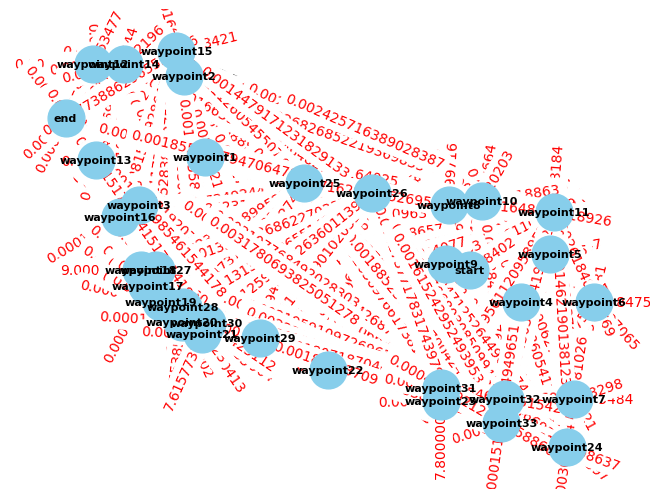

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

# 좌표 설정
coordinates = {
    'start': (36.14548, 128.3928), 
    'waypoint1': (36.14393, 128.3935),
    'waypoint2': (36.143805, 128.394),
    'waypoint3': (36.14354, 128.3932),
    'waypoint4': (36.14578, 128.3926),
    'waypoint5': (36.14595, 128.3929),
    'waypoint6': (36.14621, 128.3926),
    'waypoint7': (36.14609, 128.392),
    'waypoint8': (36.14536, 128.3932),
    'waypoint9': (36.14534, 128.392838),
    'waypoint10': (36.14555, 128.39323),
    'waypoint11': (36.14597, 128.39316),
    'waypoint12': (36.14327, 128.39408),
    'waypoint13': (36.14329, 128.39348),
    'waypoint14': (36.14345, 128.39408),
    'waypoint15': (36.14376, 128.39416),
    'waypoint16': (36.14343, 128.39313),
    'waypoint17': (36.14359, 128.3927),
    'waypoint18': (36.14355, 128.3928),
    'waypoint19': (36.14367, 128.392601),
    'waypoint20': (36.14379, 128.39248),
    'waypoint21': (36.14391, 128.3924),
    'waypoint22': (36.14465, 128.39218),
    'waypoint23': (36.14531, 128.39199),
    'waypoint24': (36.14605, 128.3917),
    'waypoint25': (36.14451, 128.39334),
    'waypoint26': (36.144907, 128.39327634),
    'waypoint27': (36.14364, 128.3928),
    'waypoint28': (36.1438, 128.39257),
    'waypoint29': (36.14425, 128.39238),
    'waypoint30': (36.14394, 128.39247),
    'waypoint31': (36.14531, 128.392068),
    'waypoint32': (36.145685, 128.392),
    'waypoint33': (36.145665, 128.39185),   
    'end': (36.14311, 128.39374),
}

# 그래프 생성
G = nx.Graph()

# 노드 추가
for node, coord in coords.items():
    G.add_node(node, pos=coord)

# 인접 노드 찾기 및 가중치 계산
for node1 in coords:
    for node2 in coords:
        if node1 != node2:
            distance = ((coords[node1][0] - coords[node2][0]) ** 2 +
                        (coords[node1][1] - coords[node2][1]) ** 2) ** 0.5
            G.add_edge(node1, node2, weight=distance)

# 그림 생성
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

# 간선에 가중치 추가
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')

# 그림 보이기
plt.show()

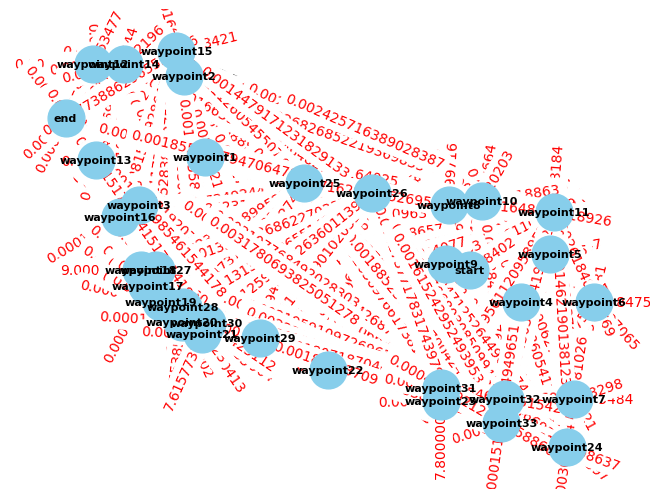

In [62]:
import folium
import networkx as nx
import matplotlib.pyplot as plt

# 좌표 설정
coordinates = {
    'start': (36.14548, 128.3928), 
    'waypoint1': (36.14393, 128.3935),
    'waypoint2': (36.143805, 128.394),
    'waypoint3': (36.14354, 128.3932),
    'waypoint4': (36.14578, 128.3926),
    'waypoint5': (36.14595, 128.3929),
    'waypoint6': (36.14621, 128.3926),
    'waypoint7': (36.14609, 128.392),
    'waypoint8': (36.14536, 128.3932),
    'waypoint9': (36.14534, 128.392838),
    'waypoint10': (36.14555, 128.39323),
    'waypoint11': (36.14597, 128.39316),
    'waypoint12': (36.14327, 128.39408),
    'waypoint13': (36.14329, 128.39348),
    'waypoint14': (36.14345, 128.39408),
    'waypoint15': (36.14376, 128.39416),
    'waypoint16': (36.14343, 128.39313),
    'waypoint17': (36.14359, 128.3927),
    'waypoint18': (36.14355, 128.3928),
    'waypoint19': (36.14367, 128.392601),
    'waypoint20': (36.14379, 128.39248),
    'waypoint21': (36.14391, 128.3924),
    'waypoint22': (36.14465, 128.39218),
    'waypoint23': (36.14531, 128.39199),
    'waypoint24': (36.14605, 128.3917),
    'waypoint25': (36.14451, 128.39334),
    'waypoint26': (36.144907, 128.39327634),
    'waypoint27': (36.14364, 128.3928),
    'waypoint28': (36.1438, 128.39257),
    'waypoint29': (36.14425, 128.39238),
    'waypoint30': (36.14394, 128.39247),
    'waypoint31': (36.14531, 128.392068),
    'waypoint32': (36.145685, 128.392),
    'waypoint33': (36.145665, 128.39185),   
    'end': (36.14311, 128.39374),
}

# 그래프 생성
G = nx.Graph()

# 노드 추가
for node, coord in coordinates.items():
    G.add_node(node, pos=coord)

# 인접 노드 찾기 및 가중치 계산
for node1 in coordinates:
    for node2 in coordinates:
        if node1 != node2:
            distance = ((coordinates[node1][0] - coordinates[node2][0]) ** 2 +
                        (coordinates[node1][1] - coordinates[node2][1]) ** 2) ** 0.5
            G.add_edge(node1, node2, weight=distance)


# 간선에 가중치 추가
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')

# folium 맵 생성
mymap = folium.Map(location=[0, 0], zoom_start=5)

# 노드 위치 추가
for node, coord in coordinates.items():
    folium.Marker(location=[coord[0], coord[1]], popup=node).add_to(mymap)

# 간선 추가
for edge, weight in labels.items():
    node1, node2 = edge
    folium.PolyLine([coordinates[node1], coordinates[node2]], color="gray", weight=2, opacity=0.5, popup=f'Weight: {weight:.2f}').add_to(mymap)

# folium 맵을 HTML 파일로 저장
mymap


In [78]:
import folium
import networkx as nx
from itertools import combinations
import math

# 좌표 설정
coordinates = {
    'start': (36.14548, 128.3928), 
    'waypoint1': (36.14393, 128.3935),
    'waypoint2': (36.143805, 128.394),
    'waypoint3': (36.14354, 128.3932),
    'waypoint4': (36.14578, 128.3926),
    'waypoint5': (36.14595, 128.3929),
    'waypoint6': (36.14621, 128.3926),
    'waypoint7': (36.14609, 128.392),
    'waypoint8': (36.14536, 128.3932),
    'waypoint9': (36.14534, 128.392838),
    'waypoint10': (36.14555, 128.39323),
    'waypoint11': (36.14597, 128.39316),
    'waypoint12': (36.14327, 128.39408),
    'waypoint13': (36.14329, 128.39348),
    'waypoint14': (36.14345, 128.39408),
    'waypoint15': (36.14376, 128.39416),
    'waypoint16': (36.14343, 128.39313),
    'waypoint17': (36.14359, 128.3927),
    'waypoint18': (36.14355, 128.3928),
    'waypoint19': (36.14367, 128.392601),
    'waypoint20': (36.14379, 128.39248),
    'waypoint21': (36.14391, 128.3924),
    'waypoint22': (36.14465, 128.39218),
    'waypoint23': (36.14531, 128.39199),
    'waypoint24': (36.14605, 128.3917),
    'waypoint25': (36.14451, 128.39334),
    'waypoint26': (36.144907, 128.39327634),
    'waypoint27': (36.14364, 128.3928),
    'waypoint28': (36.1438, 128.39257),
    'waypoint29': (36.14425, 128.39238),
    'waypoint30': (36.14394, 128.39247),
    'waypoint31': (36.14531, 128.392068),
    'waypoint32': (36.145685, 128.392),
    'waypoint33': (36.145665, 128.39185),   
    'end': (36.14311, 128.39374),
}

# 그래프 생성
G = nx.Graph()

# 노드 추가
for node, coord in coordinates.items():
    G.add_node(node, pos=coord)

# 각 노드에 대해 가장 가까운 두 개의 이웃 찾기
for node1 in G.nodes:
    # 각 노드까지의 거리 계산
    distances = [(node2, math.sqrt((coordinates[node1][0] - coordinates[node2][0])**2 + (coordinates[node1][1] - coordinates[node2][1])**2)) for node2 in G.nodes if node1 != node2]
    
    # 거리를 기준으로 가장 가까운 두 이웃 찾기
    closest_neighbors = sorted(distances, key=lambda x: x[1])[:2]
    
    # 가장 가까운 두 이웃을 연결하는 간선 추가
    for neighbor, distance in closest_neighbors:
        G.add_edge(node1, neighbor, weight=distance)

# folium 맵 생성
mymap = folium.Map(location=[0, 0], zoom_start=5)

# 노드 위치 추가


# 간선 추가
for edge in G.edges:
    node1, node2 = edge
    folium.PolyLine([coordinates[node1], coordinates[node2]], color="red", weight=2, opacity=0.5).add_to(mymap)

# folium 맵을 HTML 파일로 저장
mymap

In [84]:
import folium
import networkx as nx
import math

# 좌표 설정
coordinates = {
    'start': (36.14548, 128.3928), 
    'waypoint1': (36.14393, 128.3935),
    'waypoint2': (36.143805, 128.394),
    'waypoint3': (36.14354, 128.3932),
    'waypoint4': (36.14578, 128.3926),
    'waypoint5': (36.14595, 128.3929),
    'waypoint6': (36.14621, 128.3926),
    'waypoint7': (36.14609, 128.392),
    'waypoint8': (36.14536, 128.3932),
    'waypoint9': (36.14534, 128.392838),
    'waypoint10': (36.14555, 128.39323),
    'waypoint11': (36.14597, 128.39316),
    'waypoint12': (36.14327, 128.39408),
    'waypoint13': (36.14329, 128.39348),
    'waypoint14': (36.14345, 128.39408),
    'waypoint15': (36.14376, 128.39416),
    'waypoint16': (36.14343, 128.39313),
    'waypoint17': (36.14359, 128.3927),
    'waypoint18': (36.14355, 128.3928),
    'waypoint19': (36.14367, 128.392601),
    'waypoint20': (36.14379, 128.39248),
    'waypoint21': (36.14391, 128.3924),
    'waypoint22': (36.14465, 128.39218),
    'waypoint23': (36.14531, 128.39199),
    'waypoint24': (36.14605, 128.3917),
    'waypoint25': (36.14451, 128.39334),
    'waypoint26': (36.144907, 128.39327634),
    'waypoint27': (36.14364, 128.3928),
    'waypoint28': (36.1438, 128.39257),
    'waypoint29': (36.14425, 128.39238),
    'waypoint30': (36.14394, 128.39247),
    'waypoint31': (36.14531, 128.392068),
    'waypoint32': (36.145685, 128.392),
    'waypoint33': (36.145665, 128.39185),   
    'end': (36.14311, 128.39374),
}

# 그래프 생성
G = nx.Graph()

# 노드 추가
for node, coord in coordinates.items():
    G.add_node(node, pos=coord)

# 각 노드에 대해 가장 가까운 두 개의 이웃 찾기
for node1 in G.nodes:
    distances = [(node2, math.sqrt((coordinates[node1][0] - coordinates[node2][0])**2 + (coordinates[node1][1] - coordinates[node2][1])**2)) for node2 in G.nodes if node1 != node2]
    closest_neighbors = sorted(distances, key=lambda x: x[1])[:2]
    for neighbor, distance in closest_neighbors:
        G.add_edge(node1, neighbor, weight=distance)

# 시작 노드와 목표 노드 설정
start_node = 'end'
end_node = 'waypoint7'

# 최단 경로 찾기
shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight='weight')

# folium 맵 생성
mymap = folium.Map(location=[0, 0], zoom_start=5)

# 노드 위치 추가
for node, coord in coordinates.items():
    folium.Marker(location=[coord[0], coord[1]], popup=str(node)).add_to(mymap)

# 간선 추가
for edge in G.edges:
    node1, node2 = edge
    folium.PolyLine([coordinates[node1], coordinates[node2]], color="gray", weight=2, opacity=0.5).add_to(mymap)

# 최단 경로 추가
for i in range(len(shortest_path) - 1):
    node1, node2 = shortest_path[i], shortest_path[i + 1]
    folium.PolyLine([coordinates[node1], coordinates[node2]], color="blue", weight=2.5, opacity=1).add_to(mymap)

# folium 맵을 HTML 파일로 저장
mymap